In [1]:
import tensorflow
from tensorflow import keras

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import glob
import numpy as np
import shutil

In [5]:
img = image.load_img("J:/IMAGE+CLASSIFICATION/training/defected/df5.jpg")

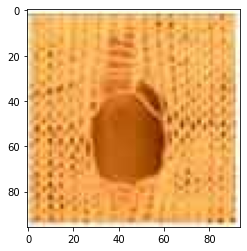

In [6]:
plt.imshow(img)

In [5]:
cv2.imread("J:/IMAGE+CLASSIFICATION/training/defected/df5.jpg").shape

(96, 94, 3)

In [3]:
dir1 = 'J:/IMAGE+CLASSIFICATION/training_gray/def_gray'
dir2 = 'J:/IMAGE+CLASSIFICATION/training_gray/non_def_gray'
dir3 = 'J:/IMAGE+CLASSIFICATION/validate_gray/def_gray'
dir4 = 'J:/IMAGE+CLASSIFICATION/validate_gray/non_def_gray'
if os.path.exists(dir1):
    shutil.rmtree(dir1)
os.makedirs(dir1)
if os.path.exists(dir2):
    shutil.rmtree(dir2)
os.makedirs(dir2)
if os.path.exists(dir3):
    shutil.rmtree(dir3)
os.makedirs(dir3)
if os.path.exists(dir4):
    shutil.rmtree(dir4)
os.makedirs(dir4)
images_path1 = glob.glob('J:/IMAGE+CLASSIFICATION/training/defected/*.jpg')
images_path2 = glob.glob('J:/IMAGE+CLASSIFICATION/training/non_defected/*.jpg')
images_path3 = glob.glob('J:/IMAGE+CLASSIFICATION/validate/defected/*.jpg')
images_path4 = glob.glob('J:/IMAGE+CLASSIFICATION/validate/non_defected/*.jpg')


i = 0
for image in images_path1:
    img = cv2.imread(image)
    gray_images = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, bin_img = cv2.threshold(gray_images,127,255,cv2.THRESH_BINARY)
    cv2.imwrite('J:/IMAGE+CLASSIFICATION/training_gray/def_gray/image%02i.jpg' %i,bin_img)
    i+=1
    cv2.waitKey(600)
    cv2.destroyAllWindows()
i = 0
for image in images_path2:
    img = cv2.imread(image)
    gray_images = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, bin_img = cv2.threshold(gray_images,127,255,cv2.THRESH_BINARY)
    cv2.imwrite('J:/IMAGE+CLASSIFICATION/training_gray/non_def_gray/image%02i.jpg' %i,bin_img)
    i+=1
    cv2.waitKey(600)
    cv2.destroyAllWindows()
i = 0
for image in images_path3:
    img = cv2.imread(image)
    gray_images = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, bin_img = cv2.threshold(gray_images,127,255,cv2.THRESH_BINARY)
    cv2.imwrite('J:/IMAGE+CLASSIFICATION/validate_gray/def_gray/image%02i.jpg' %i,bin_img)
    i+=1
    cv2.waitKey(600)
    cv2.destroyAllWindows()
i = 0
for image in images_path4:
    img = cv2.imread(image)
    gray_images = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, bin_img = cv2.threshold(gray_images,127,255,cv2.THRESH_BINARY)
    cv2.imwrite('J:/IMAGE+CLASSIFICATION/validate_gray/non_def_gray/image%02i.jpg' %i,bin_img)
    i+=1
    cv2.waitKey(600)
    cv2.destroyAllWindows()

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import glob
import numpy as np
import shutil

In [5]:
img_gray = image.load_img("J:/IMAGE+CLASSIFICATION/training_gray/def_gray/image05.jpg")

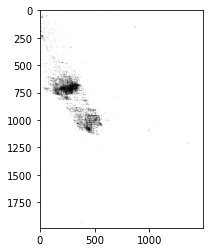

In [6]:
plt.imshow(img_gray)

In [7]:
cv2.imread("J:/IMAGE+CLASSIFICATION/training_gray/def_gray/image05.jpg").shape

(1984, 1488, 3)

In [8]:
train = ImageDataGenerator(rescale = 1./255)
validation = ImageDataGenerator(rescale = 1./255)

In [9]:
train_dataset = train.flow_from_directory('J:/IMAGE+CLASSIFICATION/training_gray',target_size = (200,200),batch_size = 10,class_mode ='binary',color_mode = 'grayscale')
validate_dataset = validation.flow_from_directory('J:/IMAGE+CLASSIFICATION/validate_gray',target_size = (200,200),batch_size = 10,class_mode ='binary',color_mode = 'grayscale')

Found 1696 images belonging to 2 classes.
Found 275 images belonging to 2 classes.


In [10]:
train_dataset.class_indices

{'def_gray': 0, 'non_def_gray': 1}

In [11]:
train_dataset.classes

array([0, 0, 0, ..., 1, 1, 1])

In [12]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (200,200,1)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512,activation ='relu'),
                                    tf.keras.layers.Dense(1,activation ='sigmoid')
                                   ])

In [13]:
model.compile(loss = 'binary_crossentropy',optimizer = 'rmsprop',metrics = ['accuracy'])

In [14]:
model_fit = model.fit(train_dataset,batch_size=10,steps_per_epoch = 8,epochs = 100,
                     validation_data = validate_dataset,verbose = 1)

Epoch 1/100
8/8 [==============================] - 94s 11s/step - loss: 4.4360 - accuracy: 0.4670 - val_loss: 1.1809 - val_accuracy: 0.6364
Epoch 2/100
8/8 [==============================] - 21s 3s/step - loss: 0.4997 - accuracy: 0.7698 - val_loss: 0.4518 - val_accuracy: 0.7891
Epoch 3/100
8/8 [==============================] - 33s 4s/step - loss: 0.5253 - accuracy: 0.8515 - val_loss: 1.1056 - val_accuracy: 0.7600
Epoch 4/100
8/8 [==============================] - 22s 3s/step - loss: 0.3076 - accuracy: 0.8964 - val_loss: 0.3470 - val_accuracy: 0.8509
Epoch 5/100
8/8 [==============================] - 20s 3s/step - loss: 0.3247 - accuracy: 0.7816 - val_loss: 1.9854 - val_accuracy: 0.6364
Epoch 6/100
8/8 [==============================] - 23s 3s/step - loss: 0.5360 - accuracy: 0.7532 - val_loss: 0.3679 - val_accuracy: 0.8509
Epoch 7/100
8/8 [==============================] - 23s 3s/step - loss: 0.2519 - accuracy: 0.9564 - val_loss: 0.7343 - val_accuracy: 0.5564
Epoch 8/100
8/8 [=========

In [16]:
#Evaluate the model against test data that never saw the training process. 
#_, test_acc = model.evaluate(test, test)
_, valid_acc = model.evaluate(validate_dataset)
print("Accuracy on the validation dataset = ", (valid_acc * 100.0), "%")
#print("Accuracy on the test dataset = ", (test_acc * 100.0), "%")

28/28 [==============================] - 9s 303ms/step - loss: 0.7671 - accuracy: 0.8945
Accuracy on the validation dataset =  89.45454359054565 %


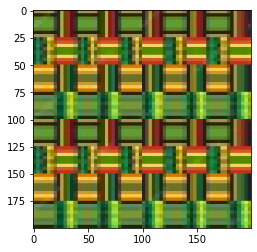

It is Not Defected


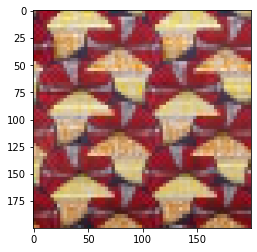

It is Not Defected


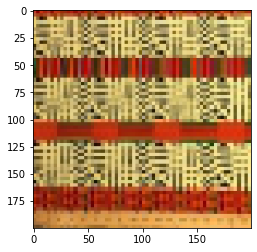

It is Not Defected


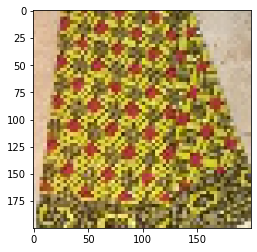

It is Not Defected


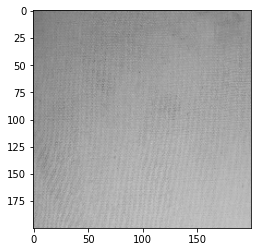

It is Defected


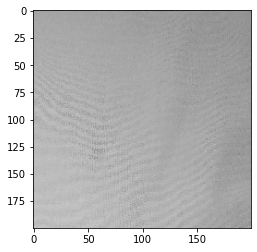

It is Defected


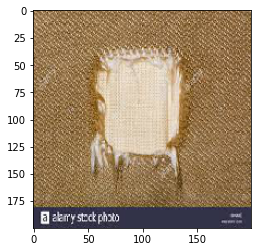

It is Defected


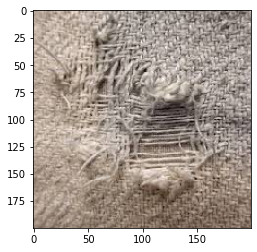

It is Defected


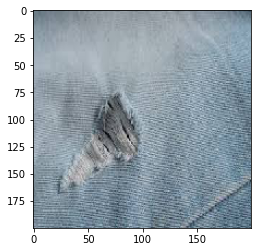

It is Defected


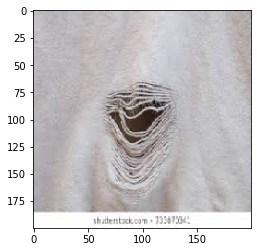

It is Defected


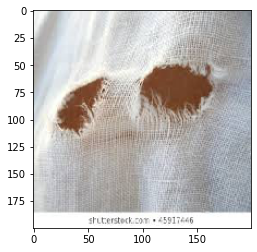

It is Defected


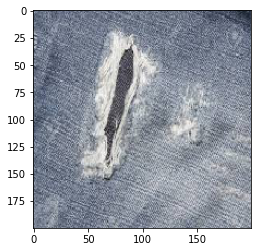

It is Defected


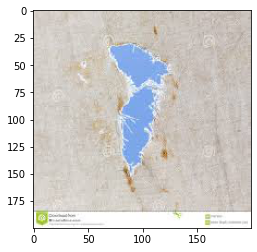

It is Defected


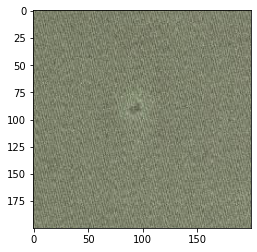

It is Defected


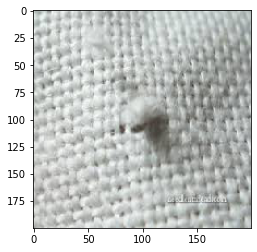

It is Defected


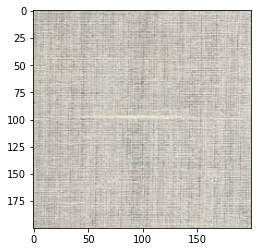

It is Defected


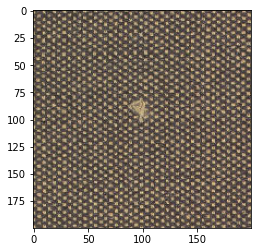

It is Defected


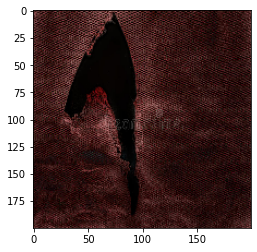

It is Not Defected


In [17]:
dir_path = 'J:/IMAGE+CLASSIFICATION/test'
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//' + i,target_size = (200,200))
    gray_images = cv2.cvtColor(np.float32(img),cv2.COLOR_BGR2GRAY)
    ret, bin_img = cv2.threshold(gray_images,127,255,cv2.THRESH_BINARY)
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(bin_img)
    X = np.expand_dims(X,axis =0)
    images = np.vstack([X])
    val = model.predict(images)
    if val == 1:
        print("It is Not Defected")
    else:
        print("It is Defected")

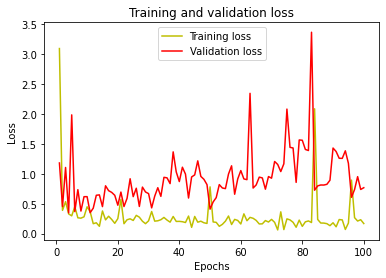

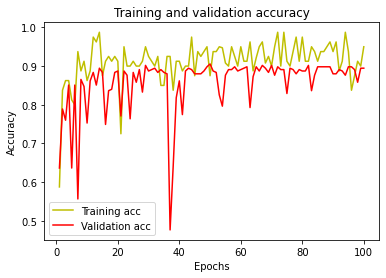

In [18]:
loss = model_fit.history['loss']
val_loss = model_fit.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = model_fit.history['accuracy']
val_acc = model_fit.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [27]:
y_actual = []
y_test =[]
c1 = 0
c2 = 0
d1 = 'J:/IMAGE+CLASSIFICATION/validate/defected'
for i in os.listdir(d1):
    img = image.load_img(d1+'//' + i,target_size = (200,200))
    gray_images = cv2.cvtColor(np.float32(img),cv2.COLOR_BGR2GRAY)
    ret, bin_img = cv2.threshold(gray_images,127,255,cv2.THRESH_BINARY)
    X = image.img_to_array(bin_img)
    X = np.expand_dims(X,axis =0)
    #images = np.vstack([X])
    val = model.predict_classes(X)
    y_test.append(val[0,0])
    y_actual.append(0)
    c1 = c1+1
d2 = 'J:/IMAGE+CLASSIFICATION/validate/non_defected'
for i in os.listdir(d2):
    img = image.load_img(d2+'//' + i,target_size = (200,200))
    gray_images = cv2.cvtColor(np.float32(img),cv2.COLOR_BGR2GRAY)
    ret, bin_img = cv2.threshold(gray_images,127,255,cv2.THRESH_BINARY)
    X = image.img_to_array(bin_img)
    X = np.expand_dims(X,axis =0)
   # images = np.vstack([X])
    val = model.predict_classes(X)
    y_test.append(val[0,0])
    y_actual.append(1)
    c2 = c2+1

C:\Users\hp\ANNACONDA\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [28]:
y_test = np.array(y_test)
y_actual = np.array(y_actual)
print(c1)
print(c2)

144
175


In [21]:
print(y_test)
print(y_actual)

[0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [35]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
cm = confusion_matrix(y_true = y_actual,y_pred = y_test)

In [36]:
import seaborn as sns

<AxesSubplot:>

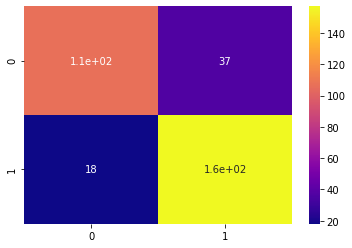

In [37]:
sns.heatmap(cm, cmap = "plasma", annot = True)